In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train_features.csv')
labels = pd.read_csv('train_labels.csv')

In [3]:
# Merging the two Datasets

data = pd.concat([data, labels], axis=1)

In [4]:
 data['WELL'].nunique()

50

In [5]:
# Splitting the dataset, using the last Well as the testing set
train_data = data[data['WELL'].isin(data['WELL'].unique()[:45])]
test_data = data[data['WELL'].isin(data['WELL'].unique()[-5:])]

print(train_data.shape)
print(test_data.shape)
print(data.shape)

(532877, 21)
(28686, 21)
(561563, 21)


In [6]:
train_data.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,...,SGR,NPHI,PEF,DTC,SP,DTS,DCAL,DRHO,LITHOFACIES_LITHOLOGY,LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,19.480835,NaN,1.611410,1.798681,1.884186,...,NaN,NaN,20.915468,161.131180,24.612379,NaN,NaN,-0.574928,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,19.468800,NaN,1.618070,1.795641,1.889794,...,NaN,NaN,19.383013,160.603470,23.895531,NaN,NaN,-0.570188,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,19.468800,NaN,1.626459,1.800733,1.896523,...,NaN,NaN,22.591518,160.173615,23.916357,NaN,NaN,-0.574245,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,19.459282,NaN,1.621594,1.801517,1.891913,...,NaN,NaN,32.191910,160.149429,23.793688,NaN,NaN,-0.586315,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,19.453100,NaN,1.602679,1.795299,1.880034,...,NaN,NaN,38.495632,160.128342,24.104078,NaN,NaN,-0.597914,65000,1.0


#### Data inspection

In [116]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532877 entries, 0 to 532876
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   WELL                    532877 non-null  object 
 1   DEPTH_MD                532877 non-null  float64
 2   X_LOC                   531879 non-null  float64
 3   Y_LOC                   531879 non-null  float64
 4   Z_LOC                   531879 non-null  float64
 5   CALI                    468466 non-null  float64
 6   RSHA                    276618 non-null  float64
 7   RMED                    526398 non-null  float64
 8   RDEP                    531879 non-null  float64
 9   RHOB                    463870 non-null  float64
 10  GR                      532877 non-null  float64
 11  SGR                     26568 non-null   float64
 12  NPHI                    334982 non-null  float64
 13  PEF                     319311 non-null  float64
 14  DTC                     5

In [117]:
# 'CALI' Column  was dropped because it contains 98% of null value in the test dataset
train_df = train_data[['DEPTH_MD', 'RMED', 'RDEP',  'RHOB', 'GR', 'NPHI', 'PEF', 'CALI',
           'LITHOFACIES_LITHOLOGY']]
test_df = test_data[['DEPTH_MD', 'RMED', 'RDEP',  'RHOB', 'GR', 'NPHI', 'PEF', 'CALI',
           'LITHOFACIES_LITHOLOGY']]
print(train_df.head(3))
print(test_df.head(3))

   DEPTH_MD      RMED      RDEP      RHOB         GR  NPHI        PEF  \
0   494.528  1.611410  1.798681  1.884186  80.200851   NaN  20.915468   
1   494.680  1.618070  1.795641  1.889794  79.262886   NaN  19.383013   
2   494.832  1.626459  1.800733  1.896523  74.821999   NaN  22.591518   

        CALI  LITHOFACIES_LITHOLOGY  
0  19.480835                  65000  
1  19.468800                  65000  
2  19.468800                  65000  
           DEPTH_MD      RMED      RDEP      RHOB          GR      NPHI  \
532877  3279.256405  1.770478  1.933949  2.761761  148.528061  0.444258   
532878  3279.408405  1.771874  1.971704  2.760896  149.781372  0.455972   
532879  3279.560405  1.790515  2.034588  2.783231  148.922867  0.470732   

              PEF  CALI  LITHOFACIES_LITHOLOGY  
532877  20.005247   NaN                  65000  
532878  19.877825   NaN                  65000  
532879  19.303011   NaN                  65000  


In [118]:
train_df.rename(columns={'LITHOFACIES_LITHOLOGY': 'LITHOLOGY'}, inplace=True)
test_df.rename(columns={'LITHOFACIES_LITHOLOGY': 'LITHOLOGY'}, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_4888\3955998368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.rename(columns={'LITHOFACIES_LITHOLOGY': 'LITHOLOGY'}, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4888\3955998368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.rename(columns={'LITHOFACIES_LITHOLOGY': 'LITHOLOGY'}, inplace=True)


In [119]:
# Checking for missing data
print(train_df.isna().sum())
print(test_df.isna().sum())

DEPTH_MD          0
RMED           6479
RDEP            998
RHOB          69007
GR                0
NPHI         197895
PEF          213566
CALI          64411
LITHOLOGY         0
dtype: int64
DEPTH_MD        0
RMED           82
RDEP            3
RHOB          270
GR              0
NPHI          211
PEF          8019
CALI         6275
LITHOLOGY       0
dtype: int64


In [120]:
import missingno as msn

<Axes: >

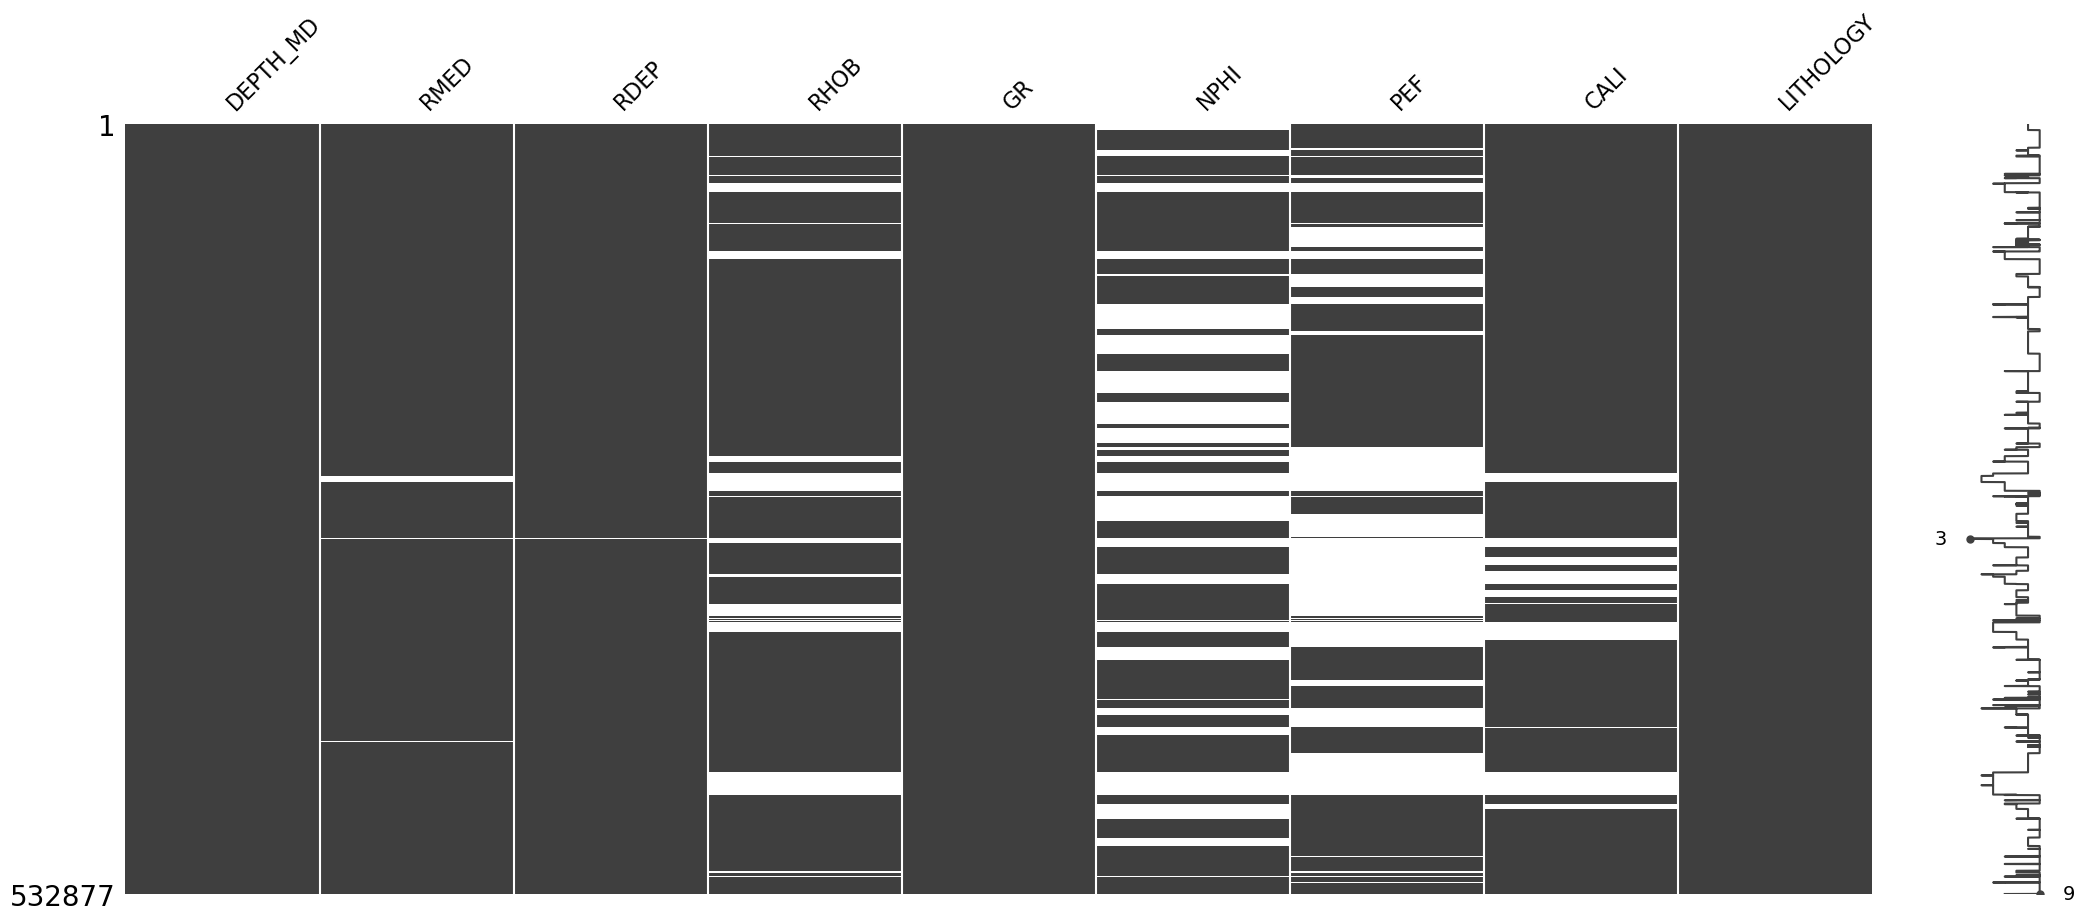

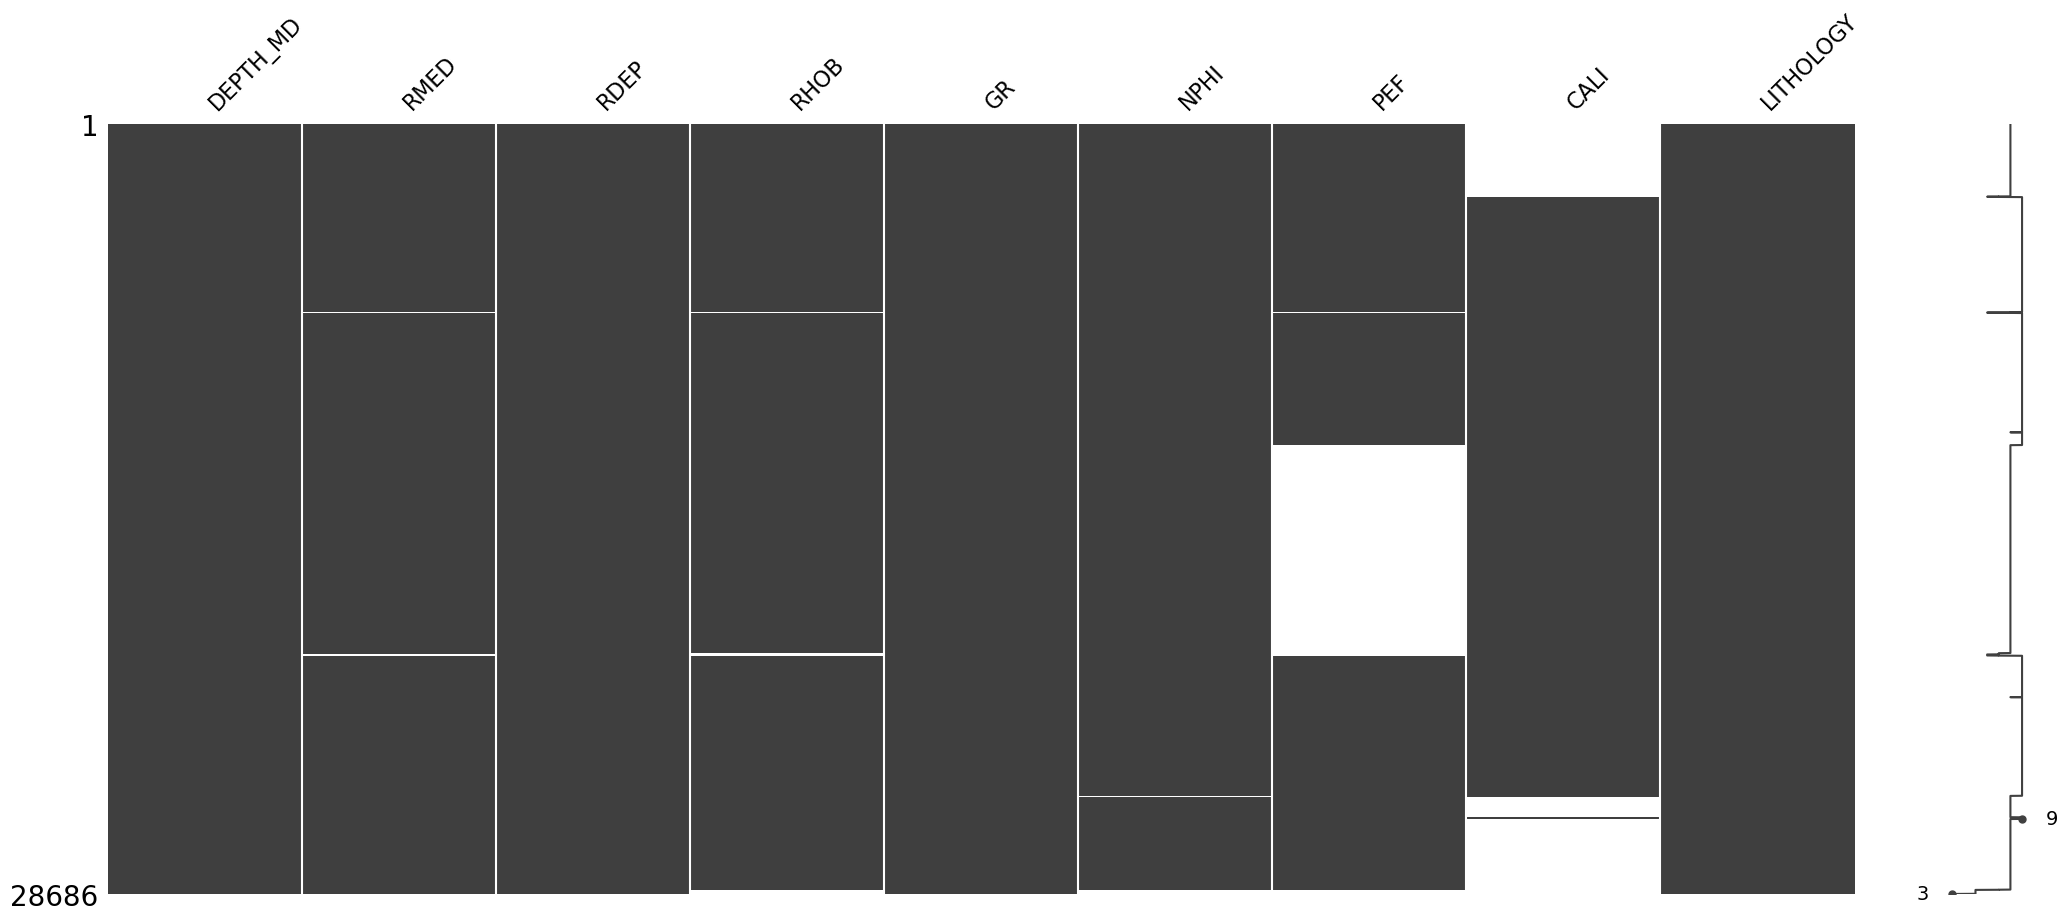

In [121]:
msn.matrix(train_df)
msn.matrix(test_df)

In [122]:
missing_percentage_train = round(train_df.isnull().sum() * 100 / len(train_df))
missing_percentage_test = round(test_df.isnull().sum() * 100 / len(test_df))
print(missing_percentage_train)
print(missing_percentage_test)

DEPTH_MD      0.0
RMED          1.0
RDEP          0.0
RHOB         13.0
GR            0.0
NPHI         37.0
PEF          40.0
CALI         12.0
LITHOLOGY     0.0
dtype: float64
DEPTH_MD      0.0
RMED          0.0
RDEP          0.0
RHOB          1.0
GR            0.0
NPHI          1.0
PEF          28.0
CALI         22.0
LITHOLOGY     0.0
dtype: float64


### Cleaning with SimpleImputer

In [123]:
from sklearn.impute import SimpleImputer

In [124]:
imputer = SimpleImputer(strategy = 'mean')
train_df[['NPHI',  'RMED', 'RDEP', 'PEF', 'CALI',
    'RHOB']] = imputer.fit_transform(train_df[['NPHI', 'RMED', 'RDEP', 'PEF', 'CALI', 'RHOB']])
test_df[['NPHI',  'RMED', 'RDEP', 'PEF', 'CALI',
    'RHOB']] = imputer.fit_transform(test_df[['NPHI', 'RMED', 'RDEP', 'PEF', 'CALI', 'RHOB']])
# 'PEF', 'CALI',

C:\Users\USER\AppData\Local\Temp\ipykernel_4888\711089949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[['NPHI',  'RMED', 'RDEP', 'PEF', 'CALI',
C:\Users\USER\AppData\Local\Temp\ipykernel_4888\711089949.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[['NPHI',  'RMED', 'RDEP', 'PEF', 'CALI',


In [125]:
# Dropping the 
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_4888\1455089495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.dropna(inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_4888\1455089495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.dropna(inplace=True)


In [126]:
missing_percentage_train = train_df.isnull().sum() * 100 / len(train_df)
missing_percentage_test = test_df.isnull().sum() * 100 / len(test_df)
print(missing_percentage_train)
print(missing_percentage_test)

DEPTH_MD     0.0
RMED         0.0
RDEP         0.0
RHOB         0.0
GR           0.0
NPHI         0.0
PEF          0.0
CALI         0.0
LITHOLOGY    0.0
dtype: float64
DEPTH_MD     0.0
RMED         0.0
RDEP         0.0
RHOB         0.0
GR           0.0
NPHI         0.0
PEF          0.0
CALI         0.0
LITHOLOGY    0.0
dtype: float64


### Treating Outlier

Text(0.5, 1.0, 'Box Plot of Gamma Ray')

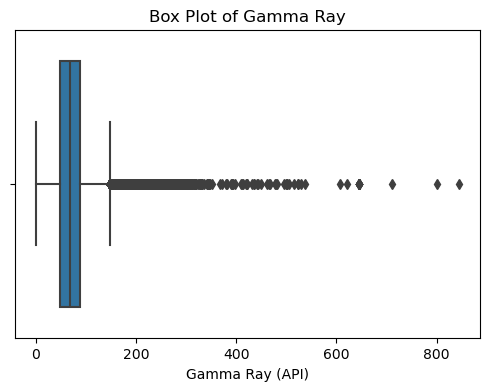

In [127]:
# Trainset Outlier Detection on Gamma Ray
plt.figure(figsize=(6, 4))
sns.boxplot(x=train_df['GR'])
plt.xlabel('Gamma Ray (API)')
plt.title('Box Plot of Gamma Ray')

Text(0.5, 1.0, 'Box Plot of Gamma Ray')

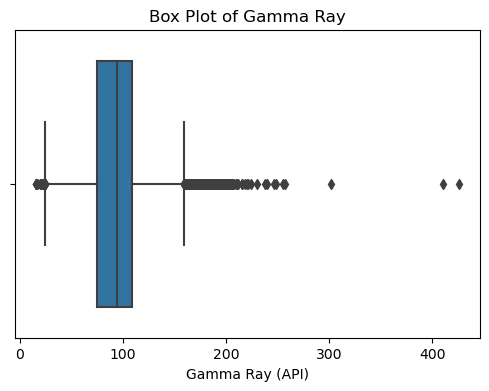

In [128]:
# Testset Outlier Detection on Gamma Ray
plt.figure(figsize=(6, 4))
sns.boxplot(x=test_df['GR'])
plt.xlabel('Gamma Ray (API)')
plt.title('Box Plot of Gamma Ray')

In [129]:
# Correction of outlier using Z_score for Training set
from scipy.stats import zscore

# Z-score threshold
z_threshold = 3

# Calculate Z-scores for the column
z_scores_train = zscore(train_df['GR'])
z_scores_test = zscore(test_df['GR'])
# Replace outliers with the mean of non-outliers
mean_non_outliers_train = train_df.loc[np.abs(z_scores_train) <= z_threshold, 'GR'].mean()
mean_non_outliers_test = test_df.loc[np.abs(z_scores_test) <= z_threshold, 'GR'].mean()

train_df.loc[:, 'GR'] = np.where(
    np.abs(z_scores_train) > z_threshold,  # Identify outliers
    mean_non_outliers_train,              # Replace outliers
    train_df['GR']               # Keep original values
)

test_df.loc[:, 'GR'] = np.where(
    np.abs(z_scores_test) > z_threshold,  # Identify outliers
    mean_non_outliers_test,              # Replace outliers
    test_df['GR']               # Keep original values
)

In [130]:
# train_df['GR'] = np.clip(train_df['GR'], 0, 200)
# test_df['GR'] = np.clip(test_df['GR'], 0, 200)

Text(0.5, 1.0, 'Box Plot of Gamma Ray Training Set')

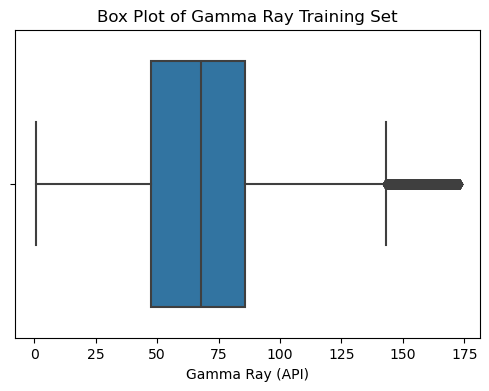

In [131]:
# Outlier Detection on Gamma Ray
plt.figure(figsize=(6, 4))
sns.boxplot(x=train_df['GR'])
plt.xlabel('Gamma Ray (API)')
plt.title('Box Plot of Gamma Ray Training Set') 

Text(0.5, 1.0, 'Box Plot of Gamma Ray Test Set')

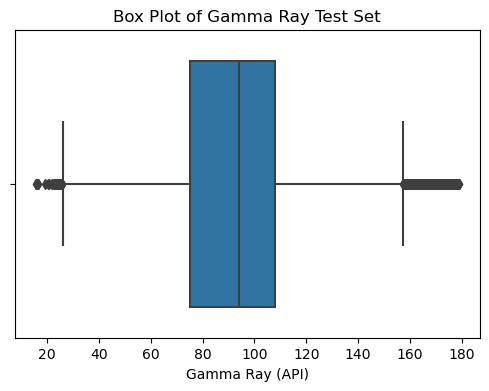

In [132]:
# Outlier Detection on Gamma Ray
plt.figure(figsize=(6, 4))
sns.boxplot(x=test_df['GR'])
plt.xlabel('Gamma Ray (API)')
plt.title('Box Plot of Gamma Ray Test Set') 

In [133]:
print(train_df.LITHOLOGY)
print(test_df.LITHOLOGY)

0         65000
1         65000
2         65000
3         65000
4         65000
          ...  
532872    30000
532873    30000
532874    30000
532875    30000
532876    30000
Name: LITHOLOGY, Length: 532877, dtype: int64
532877    65000
532878    65000
532879    65000
532880    65000
532881    65000
          ...  
561558    65030
561559    65030
561560    65030
561561    65030
561562    65030
Name: LITHOLOGY, Length: 28686, dtype: int64


In [134]:
lithology_label = {
    30000: [0, 'Sandstone'],
    65000: [1, 'Shale'],
    65030: [2, 'Sandstone/Stone'],
    70000: [3, 'Limestone'],
    70032: [4, 'Chalk'],
    74000: [5, 'Dolomite'],
    80000: [6, 'Marl'],
    86000: [7, 'Anhydrite'],
    88000: [8, 'Halite'],
    90000: [9, 'Coal'],
    93000: [10, 'Basement'],
    99000: [11, 'Tuff'],
    
}
lithology_label[74000][1]

'Dolomite'

In [135]:
#### Replace column's entries with corresponding discrete values

In [136]:
test_df["LITHOLOGY"].unique()

array([65000, 70000, 65030, 30000, 80000, 90000], dtype=int64)

In [137]:
for key, value in lithology_label.items():
    train_df.loc[train_df["LITHOLOGY"] == key, "LITHOLOGY"] = lithology_label[key][0]

for key, value in lithology_label.items():
    test_df.loc[test_df["LITHOLOGY"] == key, "LITHOLOGY"] = lithology_label[key][0]

print(f'The datatype of the label is {train_df.LITHOLOGY.dtype}')
train_df["LITHOLOGY"]


The datatype of the label is int64


0         1
1         1
2         1
3         1
4         1
         ..
532872    0
532873    0
532874    0
532875    0
532876    0
Name: LITHOLOGY, Length: 532877, dtype: int64

### Building The Models

In [138]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, ClassifierMixin 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

In [139]:
def evaluate(y_true, y_preds):

    f1 = f1_score(y_true, y_preds, average='weighted')
    precision = precision_score(y_true, y_preds, average='weighted')
    recall = recall_score(y_true, y_preds, average='weighted')
    accuracy = accuracy_score(y_true, y_preds)
    
    model_performance = {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return model_performance

In [140]:
# Data Preparation

In [141]:
# X_train = train_df.drop('LITHOLOGY', axis = 1)
# y_train = train_df['LITHOLOGY']
X = train_df.drop('LITHOLOGY', axis = 1)
y = train_df['LITHOLOGY']
# X_test = test_df.drop('LITHOLOGY', axis = 1)
# y_test = test_df['LITHOLOGY']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
y_train.shape

(426301,)

In [146]:
y_train.values

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [147]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [148]:
# Ridge Classification

rid_model = RidgeClassifier(alpha=3, max_iter=1000, solver='auto')
## Fitting the model
rid_model.fit(X_train, y_train)

RidgeClassifier(alpha=3, max_iter=1000)

In [149]:
# Prediction
rid_preds = rid_model.predict(X_test)
print(classification_report(y_test, rid_preds))

              precision    recall  f1-score   support

           0       0.55      0.42      0.47     17135
           1       0.71      0.99      0.83     66650
           2       0.39      0.01      0.02     12008
           3       0.43      0.01      0.01      5242
           4       0.00      0.00      0.00       363
           5       0.00      0.00      0.00       172
           6       0.00      0.00      0.00      2848
           7       0.00      0.00      0.00       122
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00       334
          10       0.00      0.00      0.00        21
          11       0.00      0.00      0.00      1678

    accuracy                           0.69    106576
   macro avg       0.17      0.12      0.11    106576
weighted avg       0.60      0.69      0.60    106576



C:\Users\USER\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 7131  9913    83     8     0     0     0     0     0     0     0     0]
 [  484 66093    73     0     0     0     0     0     0     0     0     0]
 [ 1501 10399   108     0     0     0     0     0     0     0     0     0]
 [ 2814  2390     8    30     0     0     0     0     0     0     0     0]
 [  345    13     5     0     0     0     0     0     0     0     0     0]
 [   38   133     0     1     0     0     0     0     0     0     0     0]
 [  439  2408     0     1     0     0     0     0     0     0     0     0]
 [  104     1     0    17     0     0     0     0     0     0     0     0]
 [    2     1     0     0     0     0     0     0     0     0     0     0]
 [   55   279     0     0     0     0     0     0     0     0     0     0]
 [    4     4     0    13     0     0     0     0     0     0     0     0]
 [   96  1579     3     0     0     0     0     0     0     0     0     0]]


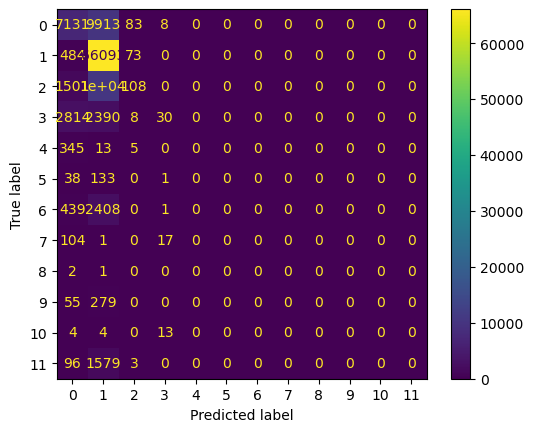

In [150]:
# Visualizing the confusion matrix Ridge
print(confusion_matrix(y_test, rid_preds))
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=rid_preds);

In [161]:
# XGBoost Classsification
# yn_train = np.where(y_train == 11, 10, y_train)
# yn_test = np.where(y_test == 11, 10, y_test)

# XGBoos Model
xgb_model = XGBClassifier()
# Fitting Xgb model
xgb_model.fit(X_train, yn_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [162]:
y_test.unique()

array([ 1,  6,  4,  0,  3,  2, 11,  9,  5,  7, 10,  8], dtype=int64)

In [163]:
# Prediction
xgb_preds = xgb_model.predict(X_test)
print(classification_report(yn_test, xgb_preds))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89     17135
           1       0.93      0.97      0.95     66650
           2       0.83      0.71      0.76     12008
           3       0.89      0.74      0.81      5242
           4       0.94      0.89      0.91       363
           5       0.72      0.41      0.52       172
           6       0.84      0.80      0.82      2848
           7       0.95      0.98      0.96       122
           8       0.50      0.33      0.40         3
           9       0.85      0.72      0.78       334
          10       0.92      0.88      0.90      1699

    accuracy                           0.91    106576
   macro avg       0.84      0.76      0.79    106576
weighted avg       0.91      0.91      0.91    106576



[[15144  1072   752    96     1     4    18     0     0    23    25     0]
 [  580 64843   833   103     0    14   196     1     1    15    64     0]
 [  955  2463  8525    42     0     3    12     0     0     5     3     0]
 [  185   757   148  3893    20     3   197     3     0     0    36     0]
 [    0     0     0    37   324     0     1     0     0     0     1     0]
 [    6    81     6     5     0    70     0     2     0     0     2     0]
 [   29   308    28   208     1     0  2273     0     0     0     1     0]
 [    0     1     0     0     0     2     0   119     0     0     0     0]
 [    1     0     1     0     0     0     0     0     1     0     0     0]
 [   32    53     8     0     0     0     0     0     0   241     0     0]
 [    2     0     1     0     0     0     0     0     0     0    18     0]
 [   16   173     0     7     0     1     1     0     0     0  1480     0]]


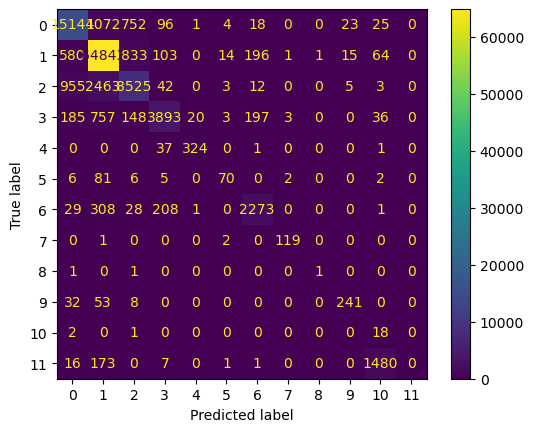

In [164]:
# Visualizing the confusion matrix xgb
print(confusion_matrix(y_test, xgb_preds))
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=xgb_preds);

In [155]:
# Random CForest Classification
rf_model = RandomForestClassifier(n_estimators=100, #max_depth=5, 
                           # min_samples_split=2, 
                            random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [156]:
rf_preds = rf_model.predict(X_test)
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     17135
           1       0.96      0.98      0.97     66650
           2       0.91      0.86      0.89     12008
           3       0.93      0.80      0.86      5242
           4       0.94      0.87      0.90       363
           5       0.90      0.40      0.55       172
           6       0.93      0.88      0.90      2848
           7       0.96      0.98      0.97       122
           8       0.00      0.00      0.00         3
           9       0.89      0.70      0.78       334
          10       1.00      0.95      0.98        21
          11       0.96      0.92      0.94      1678

    accuracy                           0.95    106576
   macro avg       0.86      0.77      0.81    106576
weighted avg       0.95      0.95      0.95    106576



[[16158   568   343    39     0     0     3     0     0    15     0     9]
 [  331 65633   498    60     0     2    90     2     1    10     0    23]
 [  514  1105 10356    21     0     3     3     0     0     3     0     3]
 [  132   644   118  4206    18     1    98     0     0     0     0    25]
 [    0     0     0    49   314     0     0     0     0     0     0     0]
 [    3    84     8     2     0    69     2     3     0     0     0     1]
 [   14   194     8   115     1     0  2515     0     0     0     0     1]
 [    0     1     0     1     0     1     0   119     0     0     0     0]
 [    2     1     0     0     0     0     0     0     0     0     0     0]
 [   34    60     7     0     0     0     0     0     0   233     0     0]
 [    1     0     0     0     0     0     0     0     0     0    20     0]
 [   11   108     0     8     0     1     1     0     0     0     0  1549]]


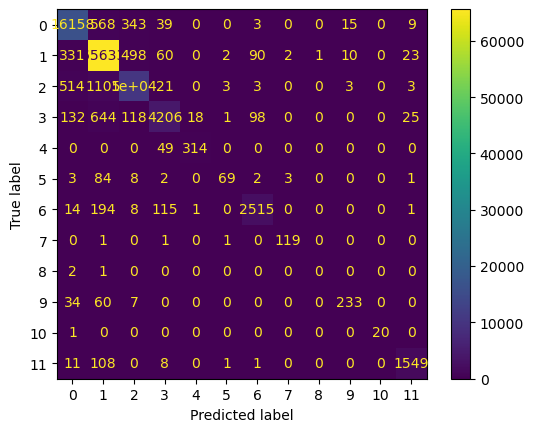

In [157]:
# Visualizing the confusion matrix rf
print(confusion_matrix(y_test, rf_preds))
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=rf_preds);

In [41]:
# Estimating the features importance on the model
features = X.columns
features

Index(['DEPTH_MD', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'CALI'], dtype='object')

In [165]:
# Decision Tree Classification
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [166]:
dt_preds = dt_model.predict(X_test)
print(classification_report(y_test, dt_preds))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     17135
           1       0.96      0.96      0.96     66650
           2       0.82      0.83      0.83     12008
           3       0.81      0.80      0.81      5242
           4       0.91      0.87      0.89       363
           5       0.41      0.45      0.43       172
           6       0.84      0.84      0.84      2848
           7       0.97      0.93      0.95       122
           8       0.00      0.00      0.00         3
           9       0.72      0.68      0.70       334
          10       1.00      0.71      0.83        21
          11       0.89      0.88      0.89      1678

    accuracy                           0.92    106576
   macro avg       0.77      0.74      0.75    106576
weighted avg       0.92      0.92      0.92    106576



[[15449   717   730   137     2    12    20     0     1    37     0    30]
 [  774 63721  1213   505     0    60   232     1     1    37     0   106]
 [  722  1207  9926    99     0    13    19     0     0    12     0    10]
 [  166   515   114  4219    28    10   160     0     2     4     0    24]
 [    0     0     0    46   315     0     2     0     0     0     0     0]
 [    5    65     9     9     0    78     2     3     0     0     0     1]
 [   29   230    21   176     2     3  2383     0     0     0     0     4]
 [    1     1     0     1     0     6     0   113     0     0     0     0]
 [    1     2     0     0     0     0     0     0     0     0     0     0]
 [   41    45    14     2     0     0     1     0     2   227     0     2]
 [    3     0     2     0     0     1     0     0     0     0    15     0]
 [   15   126     8    34     0     5     6     0     0     0     0  1484]]


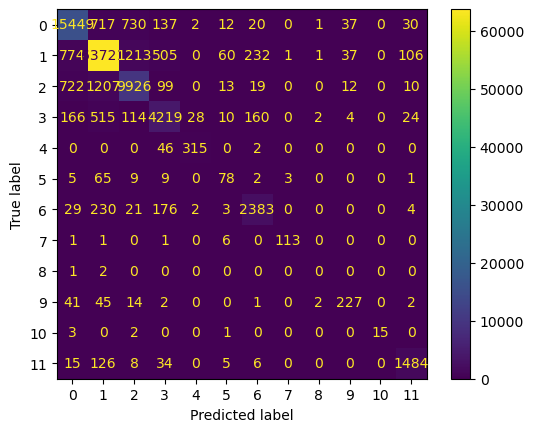

In [167]:
# Visualizing the confusion matrix rf
print(confusion_matrix(y_test, dt_preds))
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=dt_preds);

In [168]:
# # Support Vector Machine
# sv_model = SVC(kernel='rbf', random_state=42)
# sv_model.fit(X_train, y_train)

In [169]:
# svc_pred = dt_model.predict(X_test)
# print(classification_report(y_test, svc_pred))

In [170]:
# # Visualizing the confusion matrix SVC
# print(confusion_matrix(y_test, svc_preds))
# ConfusionMatrixDisplay.from_predictions(y_true=y_test,
#                                        y_pred=svc_pred);

In [171]:
# KNN Classification

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [172]:
knn_preds = knn_model.predict(X_test)
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     17135
           1       0.95      0.97      0.96     66650
           2       0.82      0.80      0.81     12008
           3       0.88      0.75      0.81      5242
           4       0.84      0.77      0.80       363
           5       0.62      0.32      0.42       172
           6       0.83      0.79      0.81      2848
           7       0.93      0.90      0.92       122
           8       0.50      0.33      0.40         3
           9       0.77      0.63      0.70       334
          10       0.90      0.86      0.88        21
          11       0.85      0.82      0.83      1678

    accuracy                           0.92    106576
   macro avg       0.82      0.74      0.77    106576
weighted avg       0.92      0.92      0.92    106576



[[15419   791   730    69     4     4    26     2     0    39     2    49]
 [  649 64467  1058   104     0     9   205     1     1    19     0   137]
 [  805  1529  9605    31     0     7    15     0     0     4     0    12]
 [  215   638   165  3914    44     6   217     2     0     0     0    41]
 [    0     1     0    84   278     0     0     0     0     0     0     0]
 [    8    86    10     5     0    55     2     2     0     0     0     4]
 [   48   289    45   205     3     1  2256     0     0     0     0     1]
 [    5     3     0     2     0     2     0   110     0     0     0     0]
 [    0     2     0     0     0     0     0     0     1     0     0     0]
 [   45    60    15     1     0     0     1     0     0   212     0     0]
 [    1     0     0     0     0     1     0     1     0     0    18     0]
 [   24   244    17    11     0     3     4     0     0     0     0  1375]]


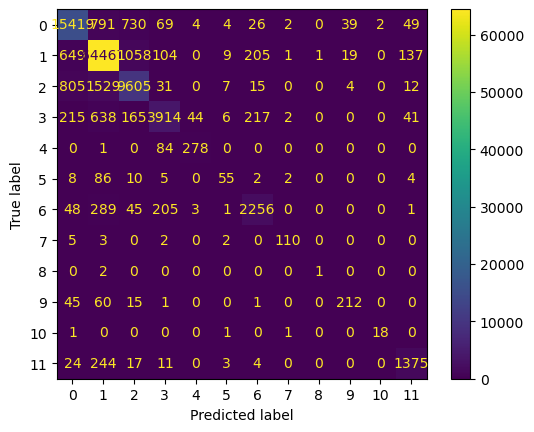

In [173]:
# Visualizing the confusion matrix knn
print(confusion_matrix(y_test, knn_preds))
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=knn_preds);

In [51]:
# PCA 

# Apply PCA for dimensionality reduction
# Retain 95% of variance
pca_model = PCA(n_components=0.95)
X_train_pca = pca_model.fit_transform(X_train)
X_test_pca = pca_model.transform(X_test)

# Train a classifier (e.g., Random Forest)
pca_rf = RandomForestClassifier(n_estimators=100, random_state=42)
pca_rf.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [52]:
pca_preds = pca_rf.predict(X_test_pca)
print(classification_report(y_test, pca_preds))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      5110
           1       0.94      0.97      0.96     25387
           2       0.83      0.76      0.79      4220
           3       0.91      0.80      0.85      2922
           4       0.92      0.69      0.79       265
           5       0.90      0.15      0.26        60
           6       0.86      0.80      0.82      1172
           7       1.00      0.92      0.96        13
           8       1.00      0.25      0.40         4
           9       0.86      0.65      0.74       155
          11       0.86      0.57      0.68       291

    accuracy                           0.91     39599
   macro avg       0.90      0.68      0.74     39599
weighted avg       0.91      0.91      0.91     39599



[[ 4531   306   241    15     0     0     4     0     0     5     8]
 [  225 24732   311    28     0     1    68     0     0     8    14]
 [  290   705  3200    18     0     0     4     0     0     3     0]
 [   94   333    69  2331    14     0    77     0     0     0     4]
 [    0     0     0    83   182     0     0     0     0     0     0]
 [    8    31     6     4     0     9     2     0     0     0     0]
 [   15   132     2    88     2     0   933     0     0     0     0]
 [    1     0     0     0     0     0     0    12     0     0     0]
 [    1     2     0     0     0     0     0     0     1     0     0]
 [   12    39     4     0     0     0     0     0     0   100     0]
 [   12   110     0     1     0     0     3     0     0     0   165]]


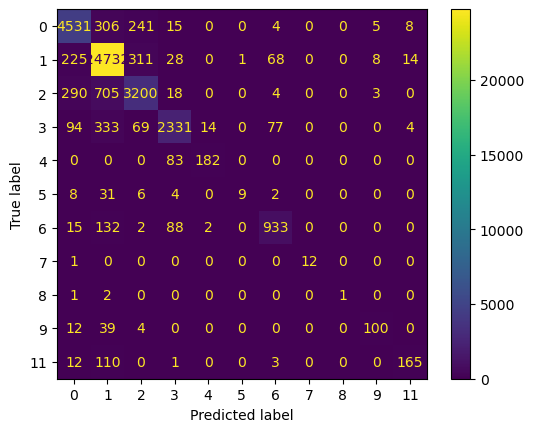

In [53]:
# Visualizing the confusion matrix PCA
print(confusion_matrix(y_test, pca_preds))
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=pca_preds);

In [54]:
# Stacked Model

# Define base models
base_model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
base_model_2 = GradientBoostingClassifier(random_state=42)

# Train base models and get predictions for stacking
# Incase i want to use cross-validation
# base_model_1_preds = cross_val_predict(base_model_1, X_train, y_train, cv=2, method="predict_proba")
# base_model_2_preds = cross_val_predict(base_model_2, X_train, y_train, cv=2, method="predict_proba")
base_model_1.fit(X_train, y_train)
base_model_2.fit(X_train, y_train)

# Get predictions for stacking
base_model_1_preds = base_model_1.predict_proba(X_train)  # Predictions from base model 1
base_model_2_preds = base_model_2.predict_proba(X_train)  # Predictions from base model 2

# Combine predictions as new features
stacked_features = np.hstack((base_model_1_preds, base_model_2_preds))

# Train meta-model (e.g., Logistic Regression)
meta_model = LogisticRegression(random_state=42, max_iter=1000)
meta_model.fit(stacked_features, y_train)

# Prepare test data for meta-model
base_model_1.fit(X_train, y_train)
base_model_2.fit(X_train, y_train)

test_preds_1 = base_model_1.predict_proba(X_test)
test_preds_2 = base_model_2.predict_proba(X_test)
stacked_test_features = np.hstack((test_preds_1, test_preds_2))

# Make predictions with the meta-model
sta_preds = meta_model.predict(stacked_test_features)

# Evaluate the model
print("Stacked Model with Meta-Learner (Logistic Regression):\n")
print("Accuracy:", accuracy_score(y_test, sta_preds))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, sta_preds))


Stacked Model with Meta-Learner (Logistic Regression):

Accuracy: 0.944796585772368
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      5110
           1       0.96      0.98      0.97     25387
           2       0.89      0.87      0.88      4220
           3       0.94      0.85      0.89      2922
           4       0.95      0.85      0.90       265
           5       1.00      0.30      0.46        60
           6       0.91      0.89      0.90      1172
           7       0.93      1.00      0.96        13
           8       1.00      0.25      0.40         4
           9       0.89      0.69      0.78       155
          11       0.97      0.82      0.89       291

    accuracy                           0.94     39599
   macro avg       0.94      0.77      0.81     39599
weighted avg       0.94      0.94      0.94     39599



[[ 4691   235   165    15     0     0     0     0     0     4     0]
 [  170 24928   203    26     0     0    48     0     0     6     6]
 [  191   338  3670    18     0     0     0     0     0     3     0]
 [   55   263    54  2476    12     0    60     1     0     0     1]
 [    0     0     0    39   226     0     0     0     0     0     0]
 [    4    33     3     2     0    18     0     0     0     0     0]
 [    3    74     0    50     0     0  1045     0     0     0     0]
 [    0     0     0     0     0     0     0    13     0     0     0]
 [    1     2     0     0     0     0     0     0     1     0     0]
 [    9    32     7     0     0     0     0     0     0   107     0]
 [    6    42     0     4     0     0     1     0     0     0   238]]


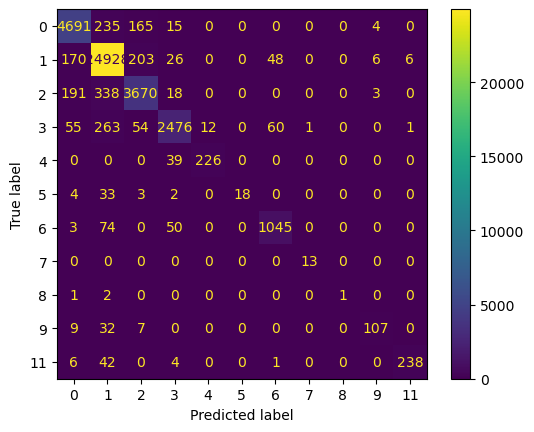

In [55]:
# Visualizing the confusion matrix stacked model
print(confusion_matrix(y_test, sta_preds))
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=sta_preds);

### ANN

In [71]:
encoder = LabelEncoder()
y = encoder.fit_transform(train_df['LITHOLOGY'])

In [72]:
print("Encoded labels:", np.unique(train_df['LITHOLOGY']))

Encoded labels: [ 0  1  2  3  4  5  6  7  8  9 11]


In [73]:
y.shape

(197991,)

In [74]:
# 2. Convert the labels to one-hot encoding
y_one_hot = tf.keras.utils.to_categorical(y)

In [75]:
# # Check the shape of one-hot encoded labels
print("One-hot encoded labels shape:", y_one_hot.shape)

One-hot encoded labels shape: (197991, 11)


In [79]:
# Prepare the features (X) and target (y)
X = train_df.drop('LITHOLOGY', axis=1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
ann_model = Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(encoder.classes_), activation='softmax') # Output layer for multi-class classification
])

ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train,
             epochs=10, batch_size=32, validation_split=0.2, validation_data=(X_test, y_test))

Epoch 1/10
4950/4950 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.5751 - loss: 11.6727 - val_accuracy: 0.6969 - val_loss: 1.0857
Epoch 2/10
4950/4950 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.6776 - loss: 1.0731 - val_accuracy: 0.7012 - val_loss: 0.9551
Epoch 3/10
4950/4950 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.7177 - loss: 0.8937 - val_accuracy: 0.7330 - val_loss: 0.8443
Epoch 4/10
4950/4950 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.7263 - loss: 0.8569 - val_accuracy: 0.7258 - val_loss: 0.8571
Epoch 5/10
4950/4950 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.7330 - loss: 0.8304 - val_accuracy: 0.7244 - val_loss: 0.8677
Epoch 6/10
4950/4950 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.7358 - loss: 0.8140 - val_accuracy: 0.7376 - val_loss: 0.7987
Epoch 7/10
4950/4950 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7374 - loss: 0.8026 - val_accuracy: 0.7458 - val_loss: 0.7798
Epoch 8/10
4950/4950 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7419 - loss: 

In [81]:
ann_preds = ann_model.predict(X_test)
ann_pred_classes = tf.argmax(ann_preds, axis=1) # Get predicted classes from softmax output

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [82]:
# 7. Print classification report
print("\nClassification Report for Neural Network:")
print(classification_report(y_test, ann_pred_classes))


Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.57      0.54      0.56      5110
           1       0.83      0.93      0.88     25387
           2       0.40      0.33      0.36      4220
           3       0.62      0.65      0.63      2922
           4       0.00      0.00      0.00       265
           5       0.00      0.00      0.00        60
           6       0.00      0.00      0.00      1172
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00       155
          10       0.00      0.00      0.00       291

    accuracy                           0.75     39599
   macro avg       0.22      0.22      0.22     39599
weighted avg       0.70      0.75      0.72     39599



C:\Users\USER\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 2763  1154   721   472     0     0     0     0     0     0     0]
 [  496 23560  1270    61     0     0     0     0     0     0     0]
 [  660  2176  1374    10     0     0     0     0     0     0     0]
 [  518   457    53  1894     0     0     0     0     0     0     0]
 [    4     0     0   261     0     0     0     0     0     0     0]
 [   25    31     2     2     0     0     0     0     0     0     0]
 [  256   551    24   341     0     0     0     0     0     0     0]
 [   13     0     0     0     0     0     0     0     0     0     0]
 [    2     2     0     0     0     0     0     0     0     0     0]
 [   57    69    29     0     0     0     0     0     0     0     0]
 [   20   260     0    11     0     0     0     0     0     0     0]]


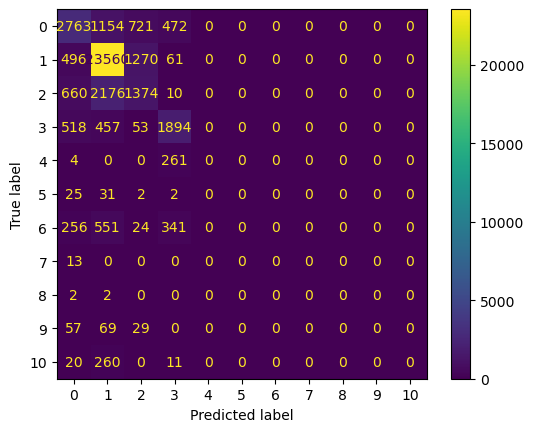

In [83]:
# Visualizing the confusion matrix stacked model
print(confusion_matrix(y_test, ann_pred_classes))
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=ann_pred_classes);

### Generating AUC/ROC Curve for the models

In [ ]:

# Code for generating ROC/AUC CURVE for multiclass prediction

# # Binarize labels for multiclass AUC/ROC
# # This is needed for one-vs-rest (OvR) calculation
# y_binarized = label_binarize(y, classes=np.unique(y))
# n_classes = y_binarized.shape[1]

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, 
#                                                     test_size=0.2, random_state=42)

# # Train a classifier (Random Forest as an example)
# xgb_ra_model = XGBClassifier()
# xgb_ra_model.fit(X_train, y_train)

# # Get predicted probabilities
# y_score = xgb_ra_model.predict_proba(X_test)
# xgb_bin_preds = xgb_ra_model.predict(X_test)
# print('Accuracy:', accuracy_score(y_test, xgb_bin_preds))
# print(classification_report(y_test, xgb_bin_preds))
# # Compute AUC for each class and overall micro-average
# fpr = {}
# tpr = {}
# roc_auc = {}
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# # Plot the ROC curves
# plt.figure()
# plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})' ''.format(roc_auc["micro"]))
# for i in range(n_classes):
#     plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=2)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) for XGB')
# plt.legend(loc="lower right")
# plt.show()

# # Print AUC values
# print("AUC for each class:")
# for i in range(n_classes):
#     print(f"Class {i}: {roc_auc[i]:.2f}")
# print(f"Micro-average AUC: {roc_auc['micro']:.2f}")


In [160]:
# Alternative code for generating the AUC/ROC CURVE for multiclass prediction

# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import label_binarize
# from sklearn.metrics import roc_curve, auc
# import numpy as np

# # Assuming y is your target variable and X is your features matrix
# # Binarize labels for multiclass AUC/ROC
# y_binarized = label_binarize(y, classes=np.unique(y))
# n_classes = y_binarized.shape[1]

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, 
#                                                     test_size=0.2, random_state=42)

# # Train a classifier (KNeighborsClassifier as an example)
# knn_ra_model = KNeighborsClassifier(n_neighbors=5)
# knn_ra_model.fit(X_train, y_train)

# # Get the predicted probabilities
# y_score = knn_ra_model.predict_proba(X_test)
# knn_bin_preds = knn_ra_model.predict(X_test)
# print('Accuracy:', accuracy_score(y_test, knn_bin_preds))
# print(classification_report(y_test, knn_bin_preds))

# # Check the shape of y_score
# print(f"Shape of y_score before transposing: {y_score[0].shape}")  # Check the first element

# # Fix the shape if necessary
# y_score = np.array(y_score).transpose(1, 0, 2)  # Transpose to shape (n_samples, n_classes, 2)

# # Debugging shapes
# print(f"Shape of y_test: {y_test.shape}")
# print(f"Shape of y_score: {y_score.shape}")

# # Ensure y_score matches y_test in shape
# if y_score.shape[0] != y_test.shape[0] or y_score.shape[1] != y_test.shape[1]:
#     raise ValueError(f"y_score shape {y_score.shape} does not match y_test shape {y_test.shape}")

# # Compute AUC for each class
# fpr = {}
# tpr = {}
# roc_auc = {}
# for i in range(n_classes):
#     # Use the second column (index 1) for the probability of the positive class
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i, 1])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score[:, :, 1].ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# # Plot the ROC curves
# plt.figure()
# plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
# for i in range(n_classes):
#     plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=2)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) for KNeighborsClassifier')
# plt.legend(loc="lower right")
# plt.show()

# # Print AUC values
# print("AUC for each class:")
# for i in range(n_classes):
#     print(f"Class {i}: {roc_auc[i]:.2f}")
# print(f"Micro-average AUC: {roc_auc['micro']:.2f}")


## AUC/ROC CURVE

In [174]:
# function for ploting auc/roc curve

def auc_roc_curve_gen(y_test, model, model_name):
    
    # Binarize the output labels for multiclass ROC
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)
    n_classes = y_test_bin.shape[1]
    if model == ann_model:
        y_score = ann_preds
    elif model == rid_model:
        y_score = rid_model.decision_function(X_test)
    elif model == pca_rf:
        y_score = pca_rf.predict_proba(X_test_pca)
    elif model == meta_model:
        y_score = meta_model.predict_proba(stacked_test_features)
    else:
        y_score = model.predict_proba(X_test)
    
    
    # Debugging shapes
    print(f"Shape of y_test: {y_test.shape}")
    print(f"Shape of y_score: {y_score.shape}")

    # Ensure y_score matches y_test in shape
    if y_score.shape[0] != y_test_bin.shape[0] or y_score.shape[1] != y_test_bin.shape[1]:
        raise ValueError(f"y_score shape {y_score.shape} does not match y_test shape {y_test_bin.shape}")

    # Compute AUC for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(n_classes):
        # Use the second column (index 1) for the probability of the positive class
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot the ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) for {str(model_name)}')
    plt.legend(loc="lower right")
    plt.show()

    # Print AUC values
    print("AUC for each class:")
    for i in range(n_classes):
        print(f"Class {i}: {roc_auc[i]:.2f}")
    print(f"Micro-average AUC: {roc_auc['micro']:.2f}")

In [175]:
auc_roc_curve_gen(y_test, xgb_model, 'XGBoost Classiie')

Shape of y_test: (106576,)
Shape of y_score: (106576, 11)


ValueError: y_score shape (106576, 11) does not match y_test shape (106576, 12)

C:\Users\USER\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Shape of y_test: (39599,)
Shape of y_score: (39599, 11)


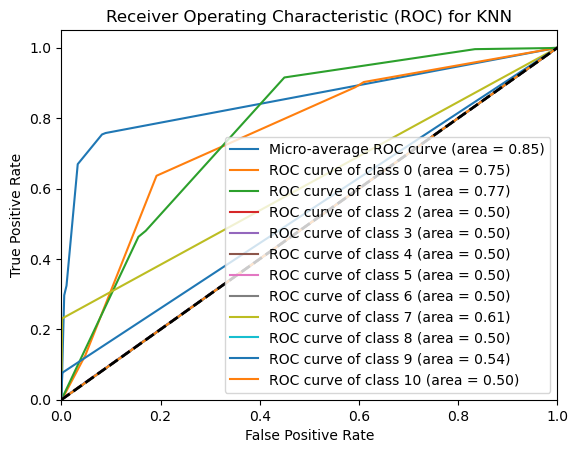

AUC for each class:
Class 0: 0.75
Class 1: 0.77
Class 2: 0.50
Class 3: 0.50
Class 4: 0.50
Class 5: 0.50
Class 6: 0.50
Class 7: 0.61
Class 8: 0.50
Class 9: 0.54
Class 10: 0.50
Micro-average AUC: 0.85


In [94]:
auc_roc_curve_gen(y_test, knn_model, 'KNN')

C:\Users\USER\anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RidgeClassifier was fitted without feature names
  warnings.warn(


Shape of y_test: (39599,)
Shape of y_score: (39599, 11)


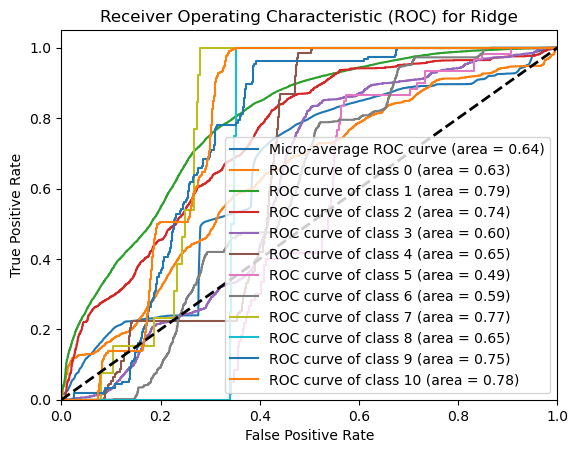

AUC for each class:
Class 0: 0.63
Class 1: 0.79
Class 2: 0.74
Class 3: 0.60
Class 4: 0.65
Class 5: 0.49
Class 6: 0.59
Class 7: 0.77
Class 8: 0.65
Class 9: 0.75
Class 10: 0.78
Micro-average AUC: 0.64


In [95]:
auc_roc_curve_gen(y_test, rid_model, 'Ridge')

Shape of y_test: (112313,)
Shape of y_score: (112313, 12)


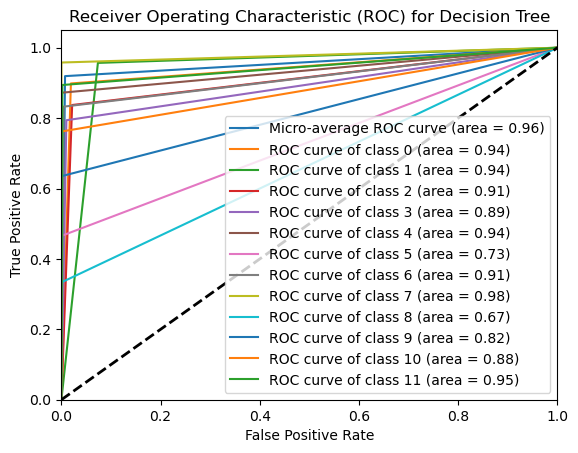

AUC for each class:
Class 0: 0.94
Class 1: 0.94
Class 2: 0.91
Class 3: 0.89
Class 4: 0.94
Class 5: 0.73
Class 6: 0.91
Class 7: 0.98
Class 8: 0.67
Class 9: 0.82
Class 10: 0.88
Class 11: 0.95
Micro-average AUC: 0.96


In [157]:
auc_roc_curve_gen(y_test, dt_model, 'Decision Tree')

Shape of y_test: (112313,)
Shape of y_score: (112313, 12)


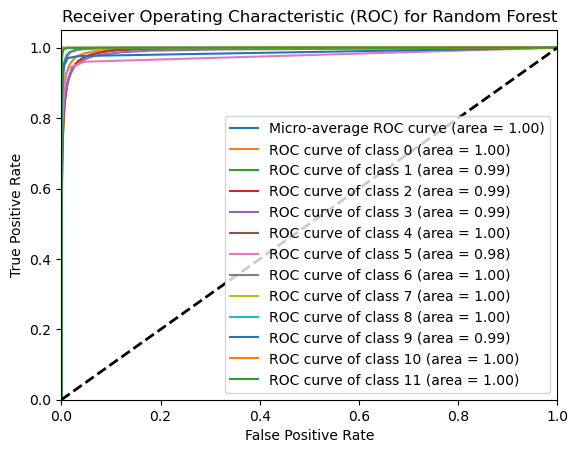

AUC for each class:
Class 0: 1.00
Class 1: 0.99
Class 2: 0.99
Class 3: 0.99
Class 4: 1.00
Class 5: 0.98
Class 6: 1.00
Class 7: 1.00
Class 8: 1.00
Class 9: 0.99
Class 10: 1.00
Class 11: 1.00
Micro-average AUC: 1.00


In [165]:
auc_roc_curve_gen(y_test, rf_model, 'Random Forest')

Shape of y_test: (112313,)
Shape of y_score: (112313, 12)


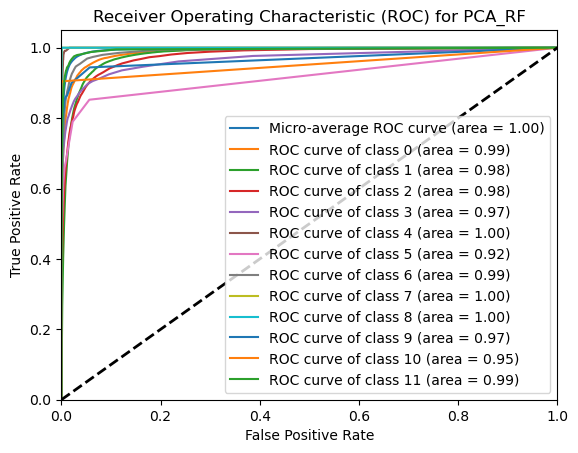

AUC for each class:
Class 0: 0.99
Class 1: 0.98
Class 2: 0.98
Class 3: 0.97
Class 4: 1.00
Class 5: 0.92
Class 6: 0.99
Class 7: 1.00
Class 8: 1.00
Class 9: 0.97
Class 10: 0.95
Class 11: 0.99
Micro-average AUC: 1.00


In [174]:
auc_roc_curve_gen(y_test, pca_rf, 'PCA_RF')

Shape of y_test: (39599,)
Shape of y_score: (39599, 11)


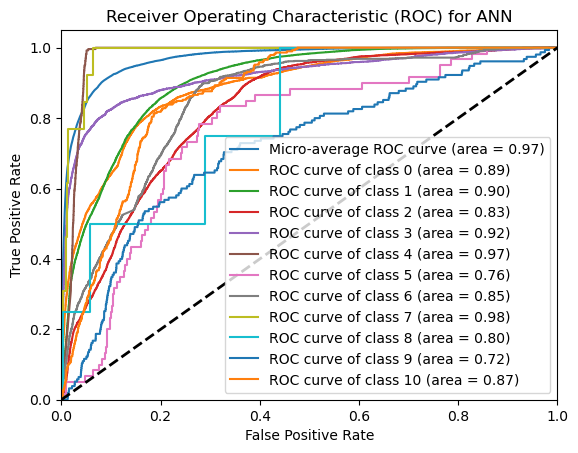

AUC for each class:
Class 0: 0.89
Class 1: 0.90
Class 2: 0.83
Class 3: 0.92
Class 4: 0.97
Class 5: 0.76
Class 6: 0.85
Class 7: 0.98
Class 8: 0.80
Class 9: 0.72
Class 10: 0.87
Micro-average AUC: 0.97


In [97]:
auc_roc_curve_gen(y_test, ann_model, 'ANN')

Shape of y_test: (39599,)
Shape of y_score: (39599, 11)


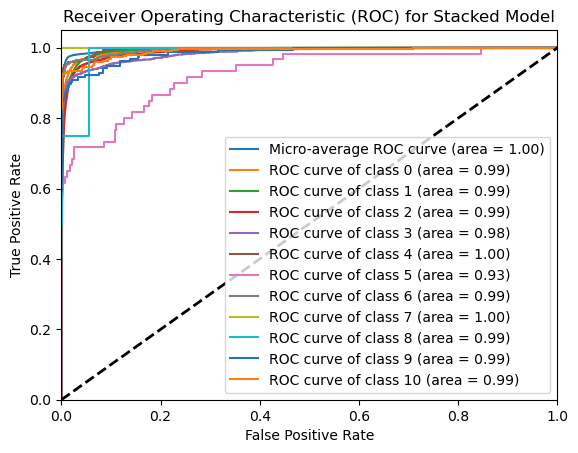

AUC for each class:
Class 0: 0.99
Class 1: 0.99
Class 2: 0.99
Class 3: 0.98
Class 4: 1.00
Class 5: 0.93
Class 6: 0.99
Class 7: 1.00
Class 8: 0.99
Class 9: 0.99
Class 10: 0.99
Micro-average AUC: 1.00


In [96]:
auc_roc_curve_gen(y_test, meta_model, 'Stacked Model')

In [98]:
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [99]:
X_test = scaler.inverse_transform(X_test)

In [100]:
columns = ['DEPTH_MD', 'CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF']
# 'DEPTH_MD', 'CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF'
df_t = pd.DataFrame(X_test, columns=columns)
df_t["Predicted_Lithofacies"] = rf_preds

In [101]:
df_t.head()

,DEPTH_MD,CALI,RMED,RDEP,RHOB,GR,NPHI,PEF,Predicted_Lithofacies
0,2.447706e+06,96.091264,88.133550,2.961705,996.257709,0.351107,35.972718,38.782938,6
1,2.049530e+06,20.593609,19.977979,2.862098,1558.325838,0.379879,23.794264,47.782948,1
2,3.051515e+06,212.869632,156.074357,2.951048,2876.352773,0.374680,30.115720,39.215472,1
3,2.454331e+06,129.697609,126.312917,2.883803,1144.093249,0.352476,44.861967,36.262398,0
4,2.369293e+06,274.529845,287.542433,2.973917,515.335736,0.338505,33.659941,48.779831,3


In [104]:
df_t['LITHOFACIES_LITHOLOGY'] = y_test

In [107]:
y_test[:10]

array([6, 1, 1, 0, 3, 2, 2, 1, 1, 1], dtype=int64)

In [108]:
df_t.tail()

,DEPTH_MD,CALI,RMED,RDEP,RHOB,GR,NPHI,PEF,Predicted_Lithofacies,LITHOFACIES_LITHOLOGY
39594,2.936714e+06,87.555711,80.865512,2.931418,2639.602235,0.381358,30.951187,42.613747,1,1
39595,1.758647e+06,82.903579,91.130221,2.912055,2910.513374,0.364599,25.131533,36.796132,0,0
39596,1.896042e+06,15.419682,14.286682,2.850672,1931.068401,0.379755,80.942910,49.656828,1,1
39597,2.031542e+06,53.838120,56.910622,2.947042,3419.294874,0.381126,25.583477,37.834880,1,1
39598,2.555933e+06,45.285900,44.319564,2.913799,2458.524325,0.375955,36.881178,58.943988,1,1


In [109]:
def make_well_facies_log_plot(logs, x1, x2, x3, x4, DEPTH_MD=False):

    logs = logs.fillna(0)
    if DEPTH_MD == False:
        logs['DEPTH_MD'] = logs.index
        DEPTH_MD = 'DEPTH_MD'
        ztop=logs.DEPTH_MD.min(); zbot=logs.DEPTH_MD.max()
    
    else:
        logs['DEPTH_MD'] = logs[DEPTH_MD]
        Depth = 'DEPTH_MD'
        ztop=logs.DEPTH_MD.min(); zbot=logs.DEPTH_MD.max()
        
    logs = logs.sort_values(by='DEPTH_MD', ascending=True)

    facies_colors = [
        'darkorange','#228B22','grey','cyan','gold','lightseagreen',
        'lawngreen','lightblue','tan','#FF4500', 'magenta',
        '#000000'
    ]

    facies_labels = [
        "Sandstone","Sandstone/Shale","Shale","Marl",
        "Dolomite","Limestone","Chalk","Halite",
        "Anhydrite","Tuff","Coal","Basement"
    ]

    facies_colormap = {}
    for ind, label in enumerate(facies_labels):
        facies_colormap[label] = facies_colors[ind]

    no = 10
    #no = len(list(dict(logs[target].value_counts())))
    cmap_facies = colors.ListedColormap(
            facies_colors[0 : no], 'indexed'
            )

    cluster=np.repeat(np.expand_dims(logs['LITHOFACIES_LITHOLOGY'].astype(float).values,1), 100, 1)
    cluster1=np.repeat(np.expand_dims(logs["Predicted_Lithofacies"].astype(float).values,1), 100, 1)
    
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 12))
    
    # Plotting the first four curves
    ax[0].plot(logs[x1], logs['DEPTH_MD'], color='green', lw=0.5)
    ax[1].plot(logs[x2], logs['DEPTH_MD'], color='red', lw=0.5)
#     ax[2].plot(logs[x3], logs['Depth'], color='blue', lw=0.5)
    ax[2]= ax[1].twiny()
    ax[2].plot(logs[x3], logs['DEPTH_MD'], color='blue', lw=0.5)
    ax[3].plot(logs[x4], logs['DEPTH_MD'], color='black', lw=0.5)
    
    # Plotting lithofacies
    im=ax[4].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=9)
    im1=ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=9)
    
    # Colorbars for lithofacies
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((10*' ').join([
        "Sandstone","Sandstone/Shale","Shale","Marl",
        "Dolomite","Limestone","Chalk","Halite",
        "Anhydrite","Tuff","Coal","Basement"
    ]))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    cbar1=plt.colorbar(im1, cax=cax)
    cbar1.set_label((10*' ').join([
        "Sandstone","Sandstone/Shale","Shale","Marl",
        "Dolomite","Limestone","Chalk","Halite",
        "Anhydrite","Tuff","Coal","Basement"
    ]))
    cbar1.set_ticks(range(0,1)); cbar1.set_ticklabels('')
    
    # Common elements for each subplot
    curve_names = ["Gamma (gAPI)", "Density (g/cm3)", "Neutron (m3/m3)", "Resistivity (ohm.m)"]
    curve_colors = ["green", "red", "blue", "black"]
    
    for i, axi in enumerate(ax[:4]):
        axi.set_ylim(ztop, zbot)
        axi.set_xlabel(curve_names[i], color=curve_colors[i])
        axi.xaxis.set_ticks_position("top")
        axi.xaxis.set_label_position("top")
        axi.grid()
        if i == 2:
#             axi.spines["top"].set_position(("axes", 1.5))
            axi.spines["top"].set_position(("axes", 1.06))
            print("yes", i)
#         axi.set_xlim(0, logs[curve_names[i].split()[0]].max())
    
    for axi in [ax[0], ax[3]]:
        plt.setp(axi.get_yticklabels(), visible=False)
    
    ax[0].set_xlim(logs[x1].min(), logs[x1].max())
    ax[1].set_xlim(logs[x2].min(), logs[x2].max())
    ax[2].set_xlim(logs[x3].max(), logs[x3].min())
    ax[3].set_xlim(1, 15)
    ax[4].set_xlabel('Actual Lithofacies')
    ax[5].set_xlabel('Predicted Lithofacies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[4].set_xticklabels([]), ax[5].set_xticklabels([])
    f.suptitle('A Visualization of the logs and the predicted lithofacies', fontsize=14,y=0.98)

In [110]:
# def make_facies_log_plot(logs, x1, x2, x3, x4, x5, DEPTH_MD=False):

#     logs = logs.fillna(0)
#     if DEPTH_MD == False:
#         logs['DEPTH_MD'] = logs.index
#         Depth = 'DEPTH_MD'
#         ztop=logs.DEPTH_MD.min(); zbot=logs.DEPTH_MD.max()
    
#     else:
#         logs['DEPTH_MD'] = logs[Depth]
#         Depth = 'DEPTH_MD'
#         ztop=logs.DEPTH_MD.min(); zbot=logs.DEPTH_MD.max()
        
#     logs = logs.sort_values(by='DEPTH_MD', ascending=True)

#     facies_colors = [
#         'darkorange','#228B22','grey','cyan','gold','lightseagreen',
#         'lawngreen','lightblue','tan','#FF4500', 'magenta',
#         '#000000'
#     ]

#     facies_labels = [
#         "Sandstone","Sandstone/Shale","Shale","Marl",
#         "Dolomite","Limestone","Chalk","Halite",
#         "Anhydrite","Tuff","Coal","Basement"
#     ]

#     facies_colormap = {}
#     for ind, label in enumerate(facies_labels):
#         facies_colormap[label] = facies_colors[ind]

#     no = 10
#     #no = len(list(dict(logs[target].value_counts())))
#     cmap_facies = colors.ListedColormap(
#             facies_colors[0 : no], 'indexed'
#             )

#     cluster=np.repeat(np.expand_dims(logs["LITHOFACIES_LITHOLOGY"].astype(float).values,1), 100, 1)
#     cluster1=np.repeat(np.expand_dims(logs["Predicted_Lithofacies"].astype(float).values,1), 100, 1)
    
#     f, ax = plt.subplots(nrows=1, ncols=7, figsize=(12, 12))
#     ax[0].plot(logs[x1], logs.DEPTH_MD, '-g')
#     ax[1].plot(logs[x2], logs.DEPTH_MD, '-')
#     ax[2].plot(logs[x3], logs.DEPTH_MD, '-', color='0.5')
#     ax[3].plot(logs[x4], logs.DEPTH_MDh, '-', color='r')
#     ax[4].plot(logs[x5], logs.DEPTH_MD, '-', color='black')
#     im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
#                     cmap=cmap_facies,vmin=0,vmax=9)
#     im1=ax[6].imshow(cluster1, interpolation='none', aspect='auto',
#                     cmap=cmap_facies,vmin=0,vmax=9)
    
#     divider = make_axes_locatable(ax[6])
#     cax = divider.append_axes("right", size="20%", pad=0.05)
#     cbar=plt.colorbar(im, cax=cax)
#     cbar.set_label((10*' ').join([
#         "Sandstone","Sandstone/Shale","Shale","Marl",
#         "Dolomite","Limestone","Chalk","Halite",
#         "Anhydrite","Tuff","Coal","Basement"
#     ]))
#     cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
#     cbar1=plt.colorbar(im1, cax=cax)
#     cbar1.set_label((10*' ').join([
#         "Sandstone","Sandstone/Shale","Shale","Marl",
#         "Dolomite","Limestone","Chalk","Halite",
#         "Anhydrite","Tuff","Coal","Basement"
#     ]))
#     cbar1.set_ticks(range(0,1)); cbar1.set_ticklabels('')
    
#     for i in range(len(ax)-2):
#         ax[i].set_ylim(ztop,zbot)
#         ax[i].invert_yaxis()
#         ax[i].grid()
#         ax[i].locator_params(axis='x', nbins=3)
    
#     ax[0].set_xlabel(x1)
#     ax[0].set_xlim(0, logs[x1].max())
#     ax[1].set_xlabel(x2)
#     ax[1].set_xlim(1.8, logs[x2].max())
#     ax[2].set_xlabel(x3)
#     ax[2].set_xlim(0, logs[x3].max())
#     ax[3].set_xlabel(x4)
#     ax[3].set_xlim(0, logs[x4].max())
#     ax[4].set_xlabel(x5)
#     ax[4].set_xscale('log')
#     ax[4].set_xlim(logs[x5].min(), logs[x5].max())
#     ax[5].set_xlabel('Actual Lithofacies')
#     ax[6].set_xlabel('Predicted Lithofacies')
    
#     ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
#     ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
#     ax[5].set_xticklabels([]), ax[6].set_xticklabels([])
#     f.suptitle('A Visualization of the logs and the predicted lithofacies', fontsize=14,y=0.94)

In [111]:
def make_facies_log_plot(logs, x1, x2, x3, x4, DEPTH_MD=False):

    logs = logs.fillna(0)
    if DEPTH_MD == False:
        logs['DEPTH_MD'] = logs.index
        Depth = 'DEPTH_MD'
        ztop=logs.DEPTH_MD.min(); zbot=logs.DEPTH_MD.max()
    
    else:
        logs['DEPTH_MD'] = logs[Depth]
        Depth = 'DEPTH_MD'
        ztop=logs.DEPTH_MD.min(); zbot=logs.DEPTH_MD.max()
        
    logs = logs.sort_values(by='DEPTH_MD', ascending=True)

    facies_colors = [
        'darkorange','#228B22','grey','cyan','gold','lightseagreen',
        'lawngreen','lightblue','tan','#FF4500', 'magenta',
        '#000000'
    ]

    facies_labels = [
        "Sandstone","Sandstone/Shale","Shale","Marl",
        "Dolomite","Limestone","Chalk","Halite",
        "Anhydrite","Tuff","Coal","Basement"
    ]

    facies_colormap = {}
    for ind, label in enumerate(facies_labels):
        facies_colormap[label] = facies_colors[ind]

    no = 10
    #no = len(list(dict(logs[target].value_counts())))
    cmap_facies = colors.ListedColormap(
            facies_colors[0 : no], 'indexed'
            )

    cluster=np.repeat(np.expand_dims(logs["LITHOFACIES_LITHOLOGY"].astype(float).values,1), 100, 1)
    cluster1=np.repeat(np.expand_dims(logs["Predicted_Lithofacies"].astype(float).values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 12))
    ax[0].plot(logs[x1], logs.DEPTH_MD, '-g')
    ax[1].plot(logs[x2], logs.DEPTH_MD, '-')
    ax[2].plot(logs[x3], logs.DEPTH_MD, '-', color='0.5')
    ax[3].plot(logs[x4], logs.DEPTH_MD, '-', color='r')
    im=ax[4].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=9)
    im1=ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=9)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((10*' ').join([
        "Sandstone","Sandstone/Shale","Shale","Marl",
        "Dolomite","Limestone","Chalk","Halite",
        "Anhydrite","Tuff","Coal","Basement"
    ]))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    cbar1=plt.colorbar(im1, cax=cax)
    cbar1.set_label((10*' ').join([
        "Sandstone","Sandstone/Shale","Shale","Marl",
        "Dolomite","Limestone","Chalk","Halite",
        "Anhydrite","Tuff","Coal","Basement"
    ]))
    cbar1.set_ticks(range(0,1)); cbar1.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel(x1)
    ax[0].set_xlim(0, logs[x1].max())
    ax[1].set_xlabel(x2)
    ax[1].set_xlim(1.8, logs[x2].max())
    ax[2].set_xlabel(x3)
    ax[2].set_xlim(0, logs[x3].max())
    ax[3].set_xlabel(x4)
    ax[3].set_xscale('log')
    ax[3].set_xlim(logs[x4].min(), logs[x4].max())
    ax[4].set_xlabel('Actual Lithofacies')
    ax[5].set_xlabel('Predicted Lithofacies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[4].set_xticklabels([]), 
    ax[5].set_xticklabels([])
    f.suptitle('A Visualization of the logs and the predicted lithofacies', fontsize=14,y=0.94)

In [112]:
data_subset = df_t.iloc[:1000]

In [113]:
data_subset['DEPTH_MD']

0      2.447706e+06
1      2.049530e+06
2      3.051515e+06
3      2.454331e+06
4      2.369293e+06
           ...     
995    3.709931e+06
996    1.234606e+06
997    3.823224e+06
998    2.257832e+06
999    3.474916e+06
Name: DEPTH_MD, Length: 1000, dtype: float64

yes 2


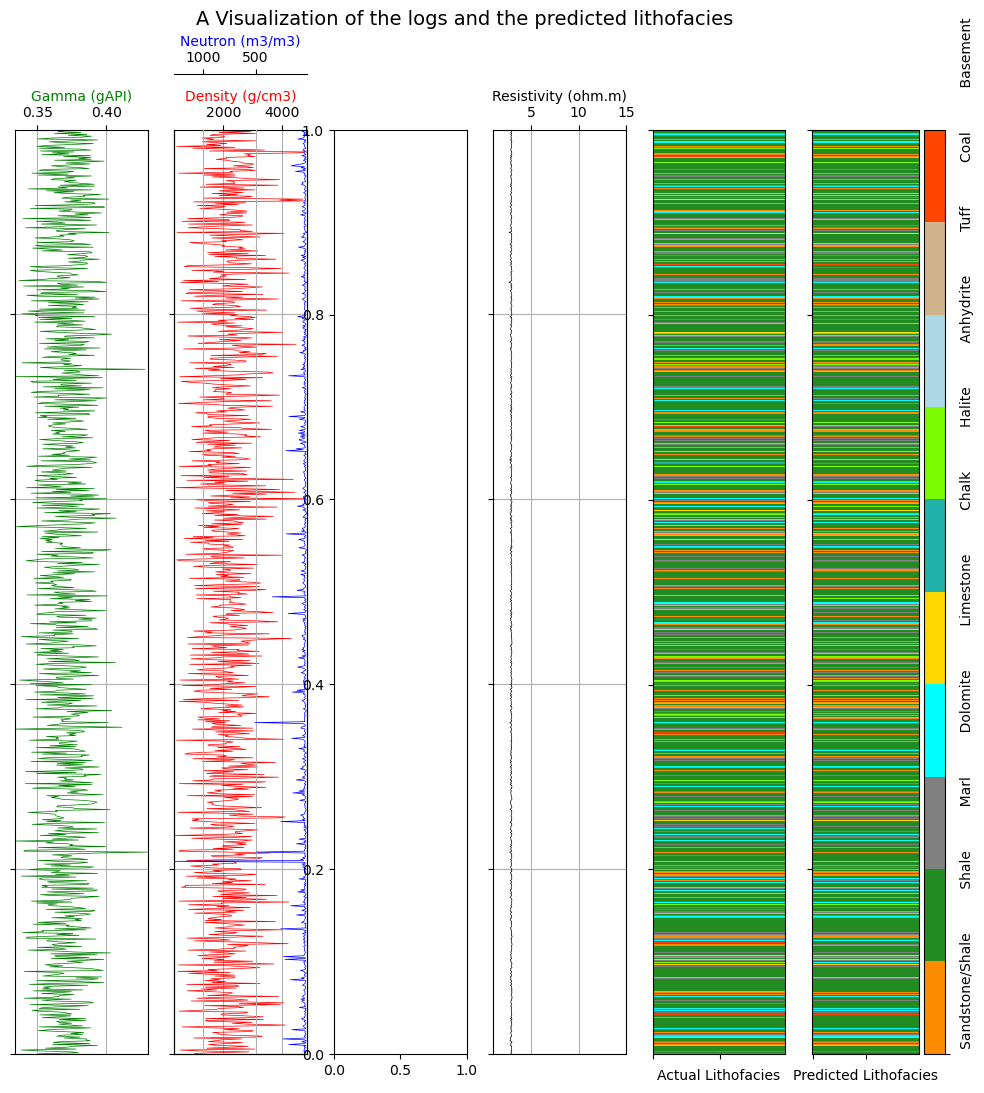

In [114]:
make_well_facies_log_plot(data_subset, "GR", "RHOB", "NPHI", "RDEP")

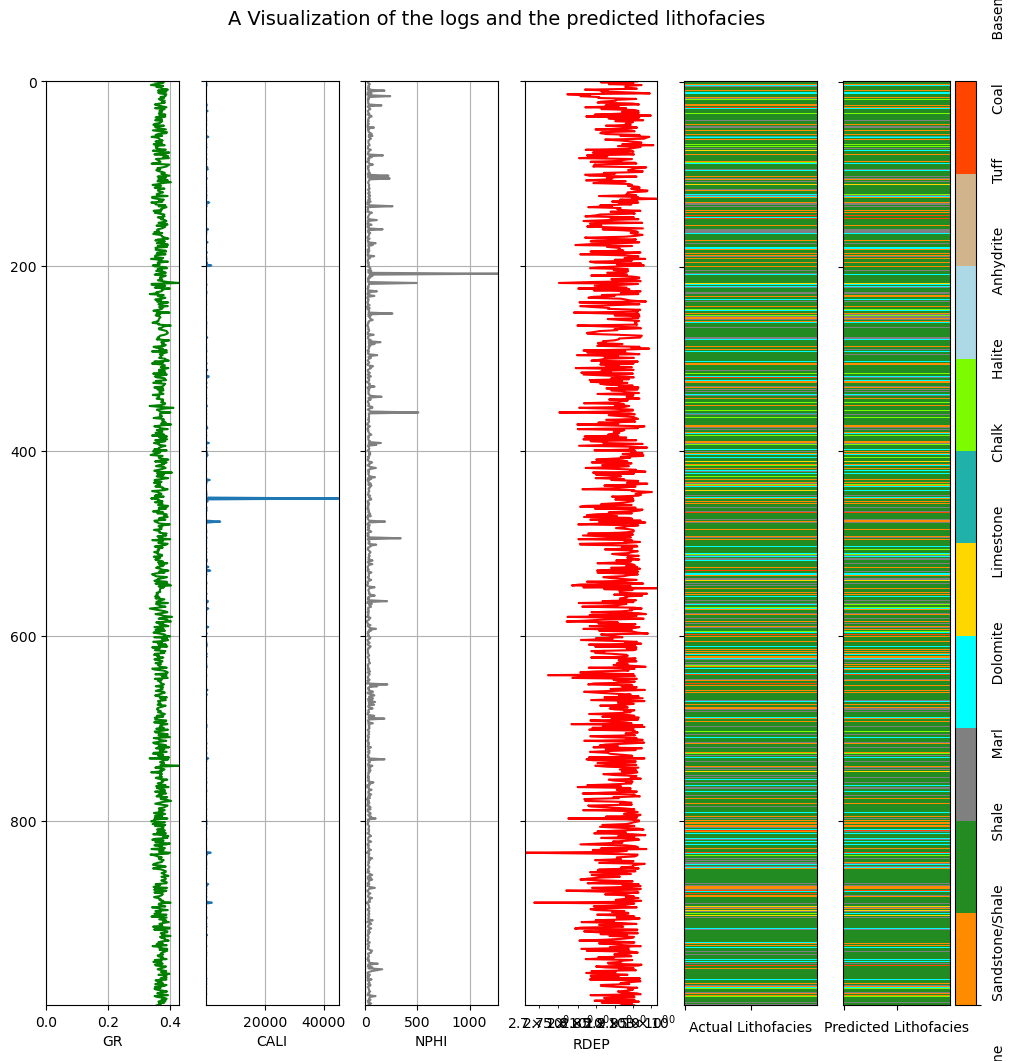

In [115]:
make_facies_log_plot(data_subset, "GR", "CALI", "NPHI", "RDEP")